In [1]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the CSV file
file_path = '/kaggle/input/petfinder-adoption-prediction/train/train.csv'
data = pd.read_csv(file_path)

data

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


In [2]:
# Drop non-numeric columns from the dataset
data = data.select_dtypes(include=['number'])

# Define the features (X) and target variable (y)
X = data.drop(columns=['AdoptionSpeed'])  # Replace 'target_column' with your target column name
y = data['AdoptionSpeed']

# Split the data into training and validation sets (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Define the parameters for the LightGBM model
params = {
    'objective': 'regression',  # Change to 'binary' for binary classification, or 'multiclass' for multiclass classification
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'verbose': 1
}

# Train the LightGBM model
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, val_data]
    # early_stopping_rounds=50,
    # verbose_eval=100
)

# Predict on the validation set
y_pred = model.predict(X_val, num_iteration=model.best_iteration)

y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 10495, number of used features: 19
[LightGBM] [Info] Start training from score 2.517675


array([3.65864704, 2.2487915 , 3.3566938 , ..., 2.95199315, 2.73421406,
       3.13595243])

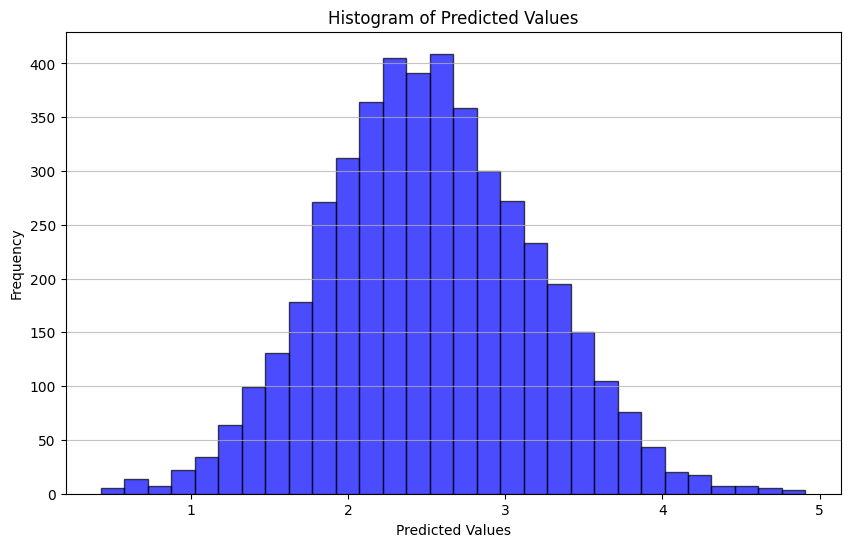

In [3]:
import matplotlib.pyplot as plt

# Assuming y_pred contains the predicted values from the regression model

# Plot the histogram of the predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the evaluation metrics
print(f'Validation RMSE: {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Validation RMSE: 1.1070778900809994
Mean Absolute Error (MAE): 0.9100774572710502
R-squared (R2): 0.1334283410048306
